In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.size'] = 10

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


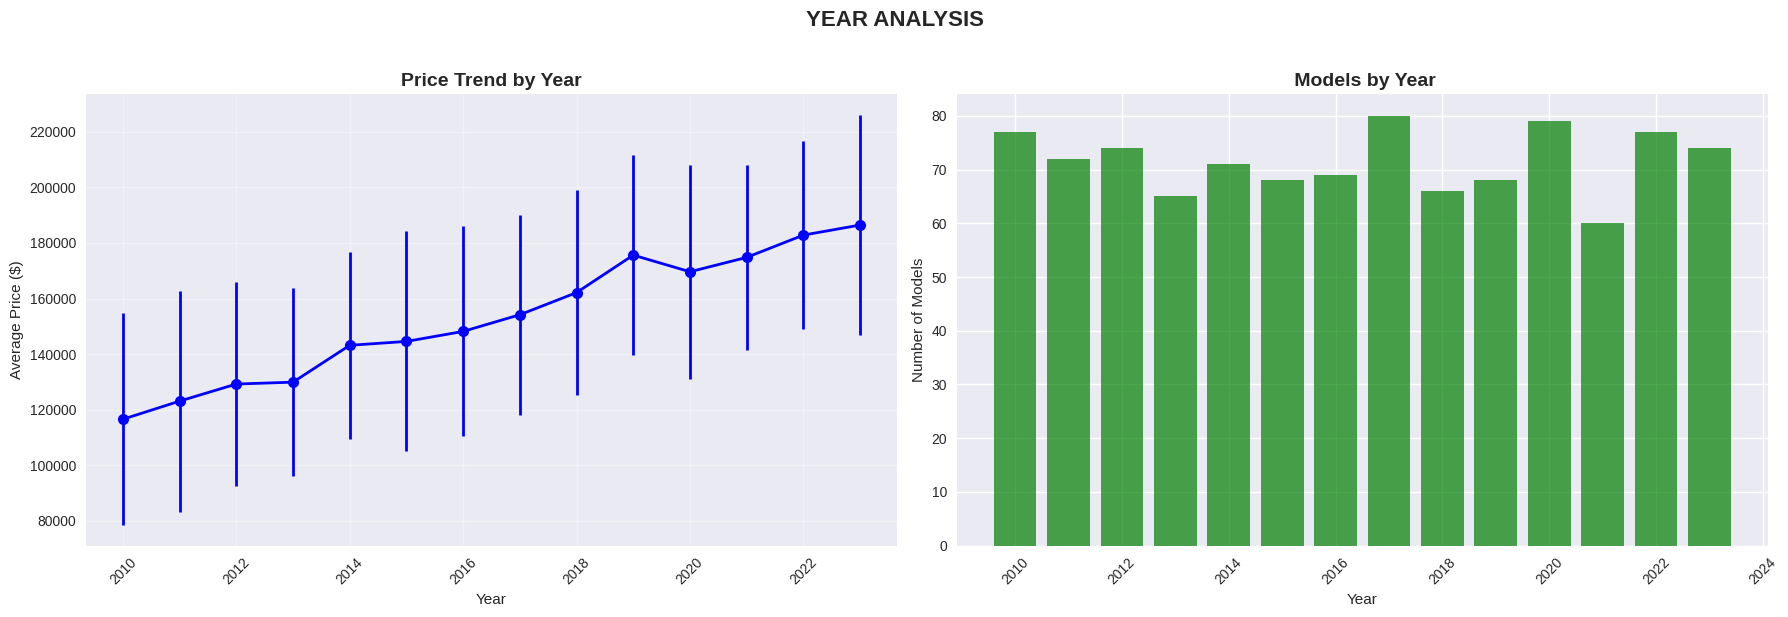

In [54]:
# YEAR ANALYSIS

def year_analysis(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    year_stats = df.groupby('Year')['Price'].agg(['mean', 'std']).reset_index()
    ax1.errorbar(year_stats['Year'], year_stats['mean'], yerr=year_stats['std'],
                marker='o', linewidth=2, markersize=8, capsize=5, color='blue')
    ax1.set_title('Price Trend by Year', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Price ($)')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    year_counts = df['Year'].value_counts().sort_index()
    ax2.bar(year_counts.index, year_counts.values, alpha=0.7, color='green')
    ax2.set_title(' Models by Year', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Models')
    ax2.tick_params(axis='x', rotation=45)

    plt.suptitle('YEAR ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

df = load_sports_car_data()
year_analysis(df)

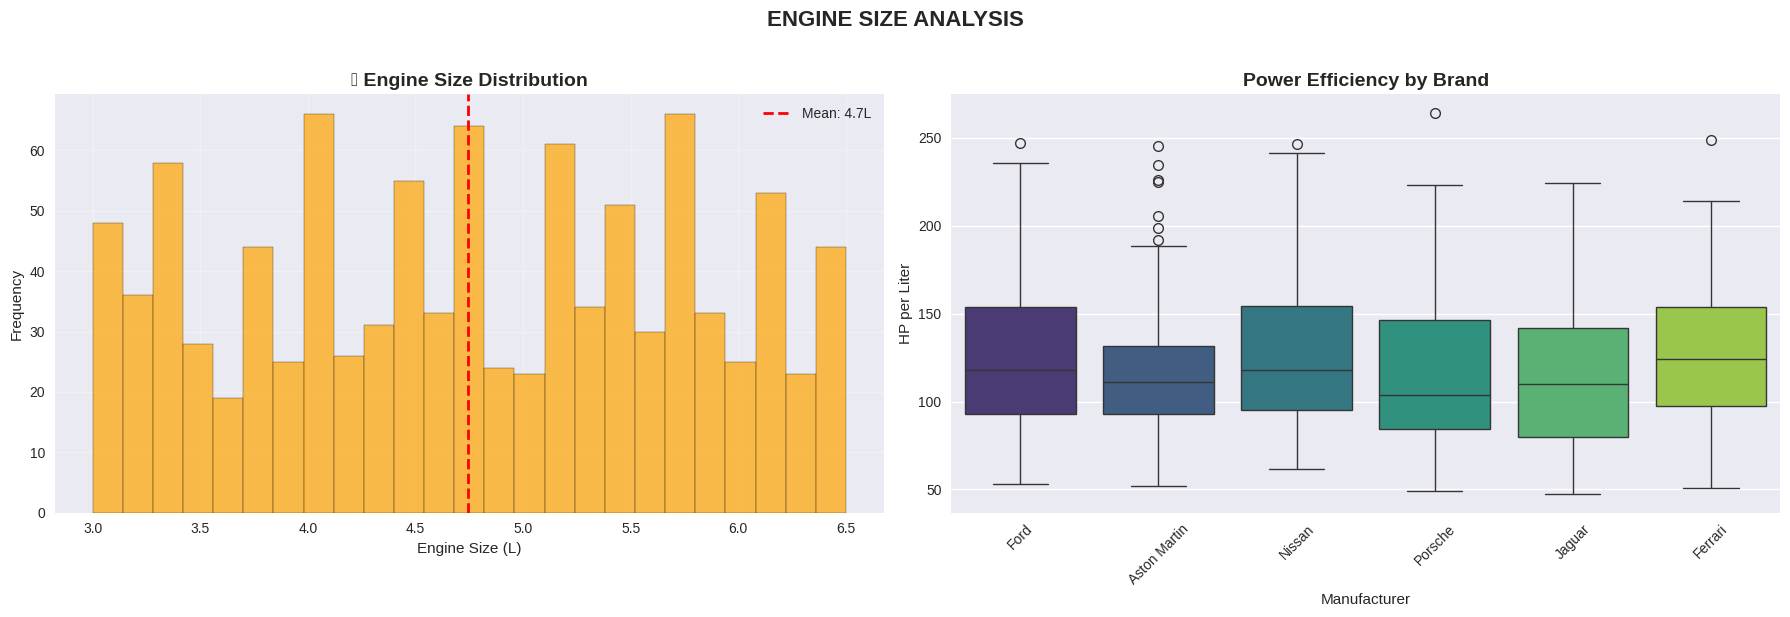

In [64]:
# ENGINE SIZE ANALYSIS

def engine_analysis(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    ax1.hist(df['Engine_Size'], bins=25, alpha=0.7, color='orange', edgecolor='black')
    mean_engine = df['Engine_Size'].mean()
    ax1.axvline(mean_engine, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_engine:.1f}L')
    ax1.set_title('Engine Size Distribution', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Engine Size (L)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    df['HP_per_Liter'] = df['Horsepower'] / df['Engine_Size']
    top_makes = df['Make'].value_counts().head(6).index
    df_eff = df[df['Make'].isin(top_makes)]
    sns.boxplot(data=df_eff, x='Make', y='HP_per_Liter', ax=ax2, palette='viridis')
    ax2.set_title('Power Efficiency by Brand', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Manufacturer')
    ax2.set_ylabel('HP per Liter')
    ax2.tick_params(axis='x', rotation=45)

    plt.suptitle('ENGINE SIZE ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

engine_analysis(df)

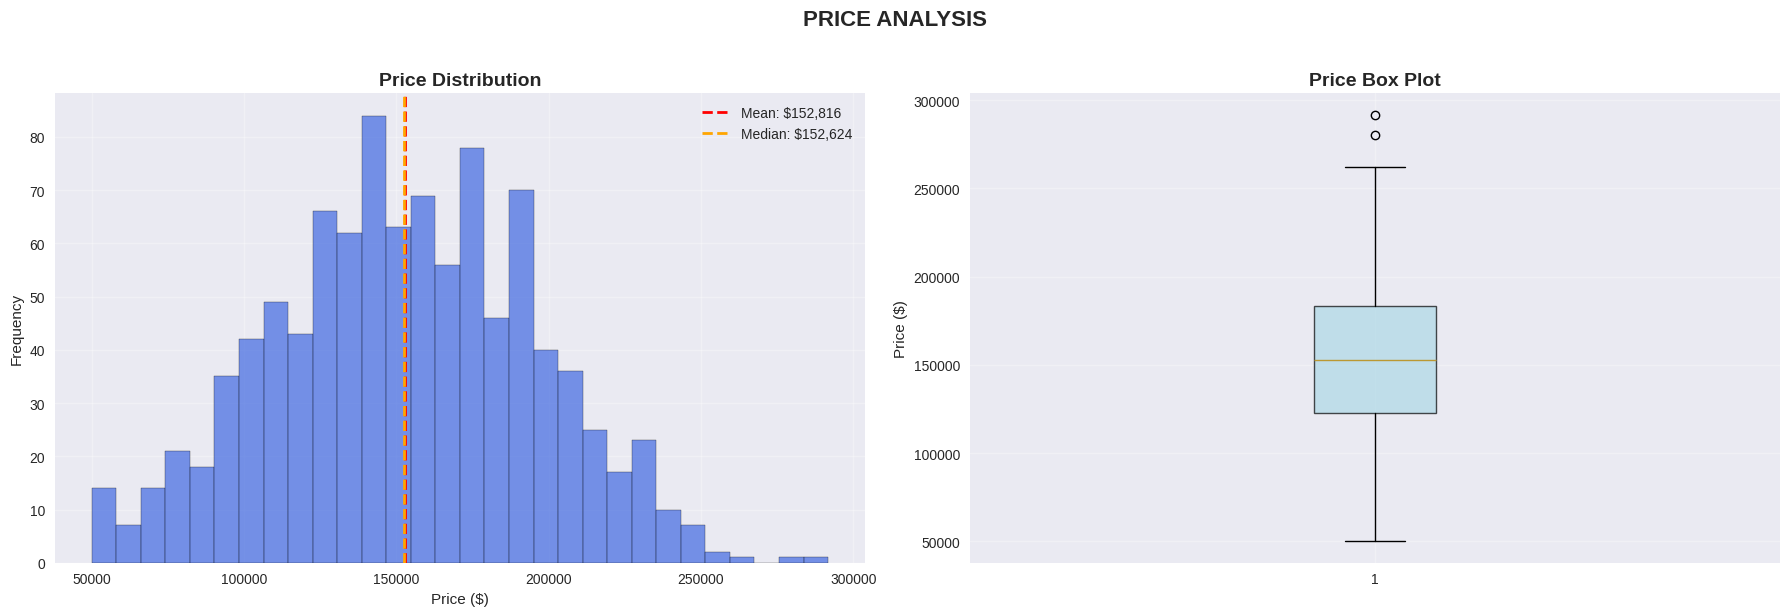

In [ ]:
# PRICE ANALYSIS

def price_analysis(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    ax1.hist(df['Price'], bins=30, alpha=0.7, color='royalblue', edgecolor='black')
    mean_price = df['Price'].mean()
    median_price = df['Price'].median()
    ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
    ax1.axvline(median_price, color='orange', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
    ax1.set_title('Price Distribution', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Price ($)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    box_plot = ax2.boxplot(df['Price'], patch_artist=True, vert=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)
    ax2.set_title('Price Box Plot', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Price ($)')
    ax2.grid(True, alpha=0.3)

    plt.suptitle('PRICE ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

price_analysis(df)

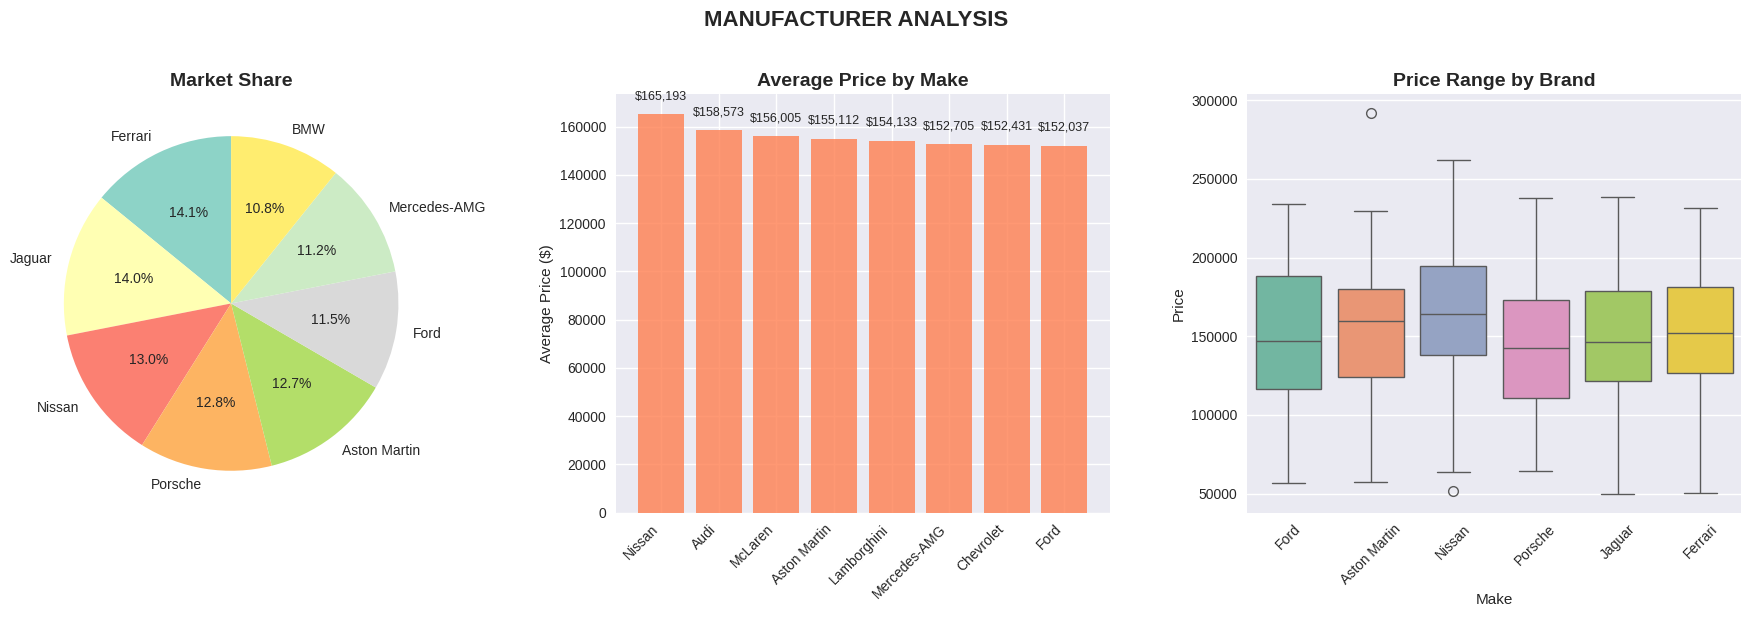

In [ ]:
# MANUFACTURER ANALYSIS

def manufacturer_analysis(df):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    make_counts = df['Make'].value_counts().head(8)
    colors = plt.cm.Set3(np.linspace(0, 1, len(make_counts)))
    ax1.pie(make_counts.values, labels=make_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax1.set_title('Market Share', fontweight='bold', fontsize=14)

    avg_prices = df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(8)
    bars = ax2.bar(range(len(avg_prices)), avg_prices.values, color='coral', alpha=0.8)
    ax2.set_xticks(range(len(avg_prices)))
    ax2.set_xticklabels(avg_prices.index, rotation=45, ha='right')
    ax2.set_title('Average Price by Make', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Average Price ($)')
    ax2.ticklabel_format(style='plain', axis='y')

    for bar, price in zip(bars, avg_prices.values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
                f'${price:,.0f}', ha='center', va='bottom', fontsize=9)

    top_makes = df['Make'].value_counts().head(6).index
    df_top = df[df['Make'].isin(top_makes)]
    sns.boxplot(data=df_top, x='Make', y='Price', ax=ax3, palette='Set2')
    ax3.set_title('Price Range by Brand', fontweight='bold', fontsize=14)
    ax3.tick_params(axis='x', rotation=45)

    plt.suptitle('MANUFACTURER ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

manufacturer_analysis(df)

In [62]:
# SUMMARY STATISTICS FUNCTIONS
def format_summary_statistics(df):
    summary_df = df.describe().transpose()

    print("Summary Statistics")
    display(summary_df.style.format("{:,.2f}").set_properties(**{'font-size': '10pt'}))

format_summary_statistics(df)

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
Year,"1,000.00","2,016.49",4.07,"2,010.00","2,013.00","2,017.00","2,020.00","2,023.00"
Horsepower,"1,000.00",552.53,145.31,300.00,428.00,562.00,680.00,799.00
Engine_Size,"1,000.00",4.74,1.01,3.00,3.90,4.75,5.60,6.50
Top_Speed,"1,000.00",267.32,48.17,180.00,228.00,266.00,308.25,349.00
Acceleration_0_60,"1,000.00",4.20,1.01,2.50,3.30,4.20,5.10,6.00
Price,"1,000.00","152,815.81","42,839.74","50,000.00","122,914.25","152,624.50","183,604.00","291,722.00"
